In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [135]:
#importing data
traffic_data = pd.read_csv("Uber_Traffic.csv")

In [136]:
#data info
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [137]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041


In [138]:
#count of data
traffic_data.count()

DateTime    48120
Junction    48120
Vehicles    48120
ID          48120
dtype: int64

In [139]:
#to find null values
traffic_data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [140]:
#for duplicate values 
traffic_data.drop_duplicates(inplace=True)

In [141]:
traffic_data.isna()

,DateTime,Junction,Vehicles,ID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
48115,False,False,False,False
48116,False,False,False,False
48117,False,False,False,False
48118,False,False,False,False


In [142]:
#MinMAx Normalization
scaler = MinMaxScaler()

In [143]:
#select the column to be normalized
column_to_normalize = ['Vehicles']

In [144]:
traffic_data["normalized_data"] = scaler.fit_transform(traffic_data[column_to_normalize])


In [145]:
# shows first few lines of updated data 
print(traffic_data.head())

        DateTime  Junction  Vehicles           ID  normalized_data
0  01/11/15 0:00         1        15  20151101001         0.078212
1  01/11/15 1:00         1        13  20151101011         0.067039
2  01/11/15 2:00         1        10  20151101021         0.050279
3  01/11/15 3:00         1         7  20151101031         0.033520
4  01/11/15 4:00         1         9  20151101041         0.044693


In [146]:
 columns_to_standardize = ['Vehicles']

In [147]:
#to calculate the Z score to find the standardization of Vehicles
for column in columns_to_standardize:
    new_column_name = column + '_zscore'
    traffic_data[new_column_name] = zscore(traffic_data[column])

In [148]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID,normalized_data,Vehicles_zscore
0,01/11/15 0:00,1,15,20151101001,0.078212,-0.375489
1,01/11/15 1:00,1,13,20151101011,0.067039,-0.471875
2,01/11/15 2:00,1,10,20151101021,0.050279,-0.616454
3,01/11/15 3:00,1,7,20151101031,0.033520,-0.761034
4,01/11/15 4:00,1,9,20151101041,0.044693,-0.664648


In [149]:
# time-based features such as the hour of the day, day of the week, and month can provide valuable insights into time series data.
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['Hour_of_day'] = traffic_data['DateTime'].dt.hour
traffic_data['Day_of_week'] = traffic_data['DateTime'].dt.dayofweek  
traffic_data['Month'] = traffic_data['DateTime'].dt.month

traffic_data.head()

C:\Users\rohit\AppData\Local\Temp\ipykernel_5008\805555069.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])


,DateTime,Junction,Vehicles,ID,normalized_data,Vehicles_zscore,Hour_of_day,Day_of_week,Month
0,2015-01-11 00:00:00,1,15,20151101001,0.078212,-0.375489,0,6,1
1,2015-01-11 01:00:00,1,13,20151101011,0.067039,-0.471875,1,6,1
2,2015-01-11 02:00:00,1,10,20151101021,0.050279,-0.616454,2,6,1
3,2015-01-11 03:00:00,1,7,20151101031,0.033520,-0.761034,3,6,1
4,2015-01-11 04:00:00,1,9,20151101041,0.044693,-0.664648,4,6,1


In [150]:
#Lag features
#By lag features, we can incorporate the influence of past values into our predictive models.
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
hours_to_shift =1
traffic_data['lag_1hour_vehicles']=traffic_data.groupby('Junction')['Vehicles'].shift(hours_to_shift)
print(traffic_data.head())

             DateTime  Junction  Vehicles           ID  normalized_data  \
0 2015-01-11 00:00:00         1        15  20151101001         0.078212   
1 2015-01-11 01:00:00         1        13  20151101011         0.067039   
2 2015-01-11 02:00:00         1        10  20151101021         0.050279   
3 2015-01-11 03:00:00         1         7  20151101031         0.033520   
4 2015-01-11 04:00:00         1         9  20151101041         0.044693   

   Vehicles_zscore  Hour_of_day  Day_of_week  Month  lag_1hour_vehicles  
0        -0.375489            0            6      1                 NaN  
1        -0.471875            1            6      1                15.0  
2        -0.616454            2            6      1                13.0  
3        -0.761034            3            6      1                10.0  
4        -0.664648            4            6      1                 7.0  


In [151]:
#Binary indicators
#Each category is converted into a new binary column where the presence of a category is indicated by 1 and its absence by 0. 
traffic_data['is_weekend'] = traffic_data['DateTime'].dt.dayofweek>=5

special_event=['2023-06-01']

special_event = pd.to_datetime(special_event)

traffic_data['is_special_event']=traffic_data['DateTime'].dt.date.isin(special_event.date)

traffic_data.head()

,DateTime,Junction,Vehicles,ID,normalized_data,Vehicles_zscore,Hour_of_day,Day_of_week,Month,lag_1hour_vehicles,is_weekend,is_special_event
0,2015-01-11 00:00:00,1,15,20151101001,0.078212,-0.375489,0,6,1,NaN,True,False
1,2015-01-11 01:00:00,1,13,20151101011,0.067039,-0.471875,1,6,1,15.0,True,False
2,2015-01-11 02:00:00,1,10,20151101021,0.050279,-0.616454,2,6,1,13.0,True,False
3,2015-01-11 03:00:00,1,7,20151101031,0.033520,-0.761034,3,6,1,10.0,True,False
4,2015-01-11 04:00:00,1,9,20151101041,0.044693,-0.664648,4,6,1,7.0,True,False


                    DateTime      Junction  Vehicles        ID  \
DateTime            1.000000  1.990738e-01  0.231934  0.890785   
Junction            0.199074  1.000000e+00 -0.613787  0.221876   
Vehicles            0.231934 -6.137872e-01  1.000000  0.227974   
ID                  0.890785  2.218756e-01  0.227974  1.000000   
normalized_data     0.231934 -6.137872e-01  1.000000  0.227974   
Vehicles_zscore     0.231934 -6.137872e-01  1.000000  0.227974   
Hour_of_day         0.001385 -2.132575e-15  0.219938  0.000012   
Day_of_week        -0.012262 -2.895772e-03 -0.084059 -0.017052   
Month               0.103345 -7.569928e-02 -0.016758 -0.357262   
lag_1hour_vehicles  0.231816 -6.138003e-01  0.970143  0.227864   
is_weekend         -0.012590 -2.275273e-03 -0.096628 -0.015898   
is_special_event         NaN           NaN       NaN       NaN   

                    normalized_data  Vehicles_zscore   Hour_of_day  \
DateTime                   0.231934         0.231934  1.385332e-03   
J

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


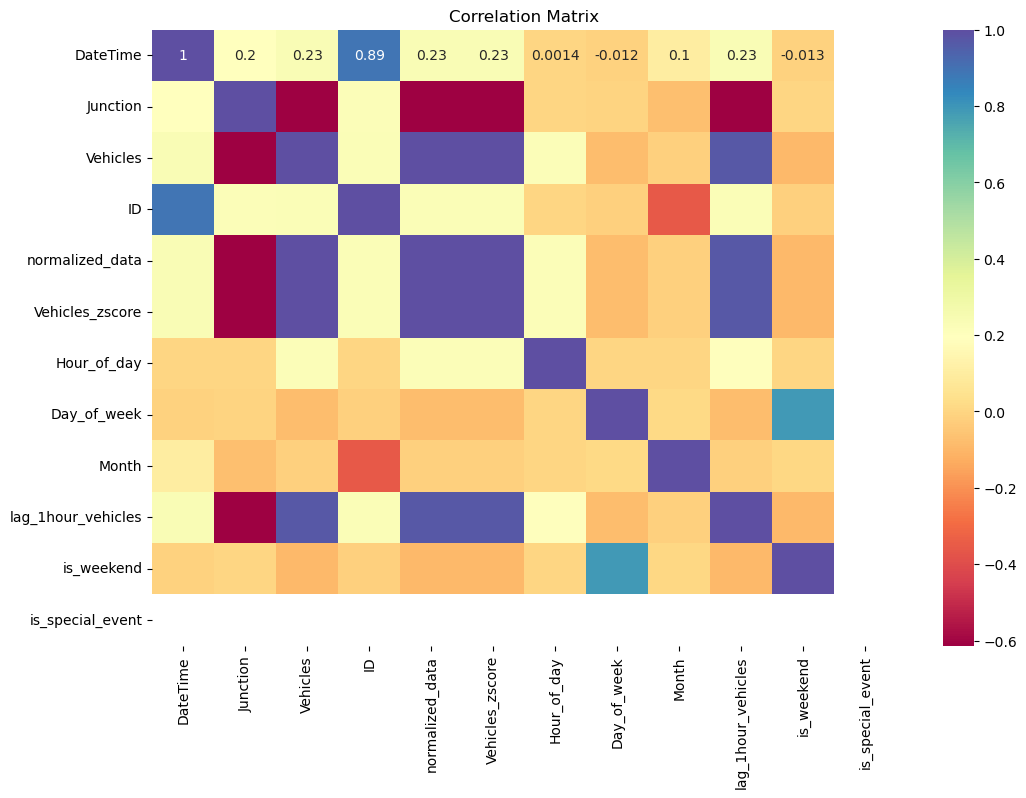

DateTime              0.231934
Junction             -0.613787
Vehicles              1.000000
ID                    0.227974
normalized_data       1.000000
Vehicles_zscore       1.000000
Hour_of_day           0.219938
Day_of_week          -0.084059
Month                -0.016758
lag_1hour_vehicles    0.970143
is_weekend           -0.096628
is_special_event           NaN
Name: Vehicles, dtype: float64


In [152]:
#Correlation Matrix Analysis
#Correlation analysis helps in understanding the relationship between numerical features and the target variable.
correlation_matrix = traffic_data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()
target_correlation = correlation_matrix['Vehicles'] 
print(target_correlation)

In [153]:
traffic_data.dropna(inplace = True)
traffic_data.isnull().sum()

DateTime              0
Junction              0
Vehicles              0
ID                    0
normalized_data       0
Vehicles_zscore       0
Hour_of_day           0
Day_of_week           0
Month                 0
lag_1hour_vehicles    0
is_weekend            0
is_special_event      0
dtype: int64

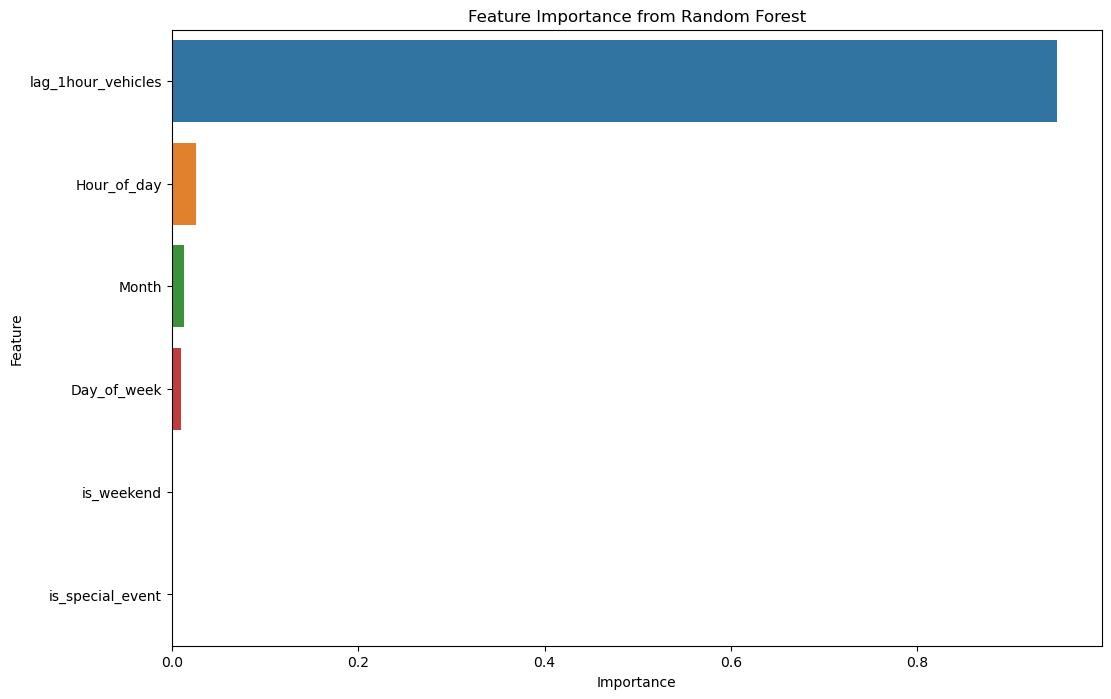

In [154]:
#feature importance with random forest
features=['Hour_of_day', 'Day_of_week', 'Month', 'is_weekend', 'is_special_event', 'lag_1hour_vehicles']
X=traffic_data[features]
Y=traffic_data['Vehicles']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df=pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [155]:
threshold=0.1

selected_features=feature_importance_df[feature_importance_df['Importance']>threshold]['Feature'].tolist()

print(f"Selected features: {selected_features}")

Selected features: ['lag_1hour_vehicles']


In [156]:
X_selected=X[selected_features]

X_train_selected, X_test_selected, Y_train, Y_test=train_test_split(X_selected, Y, test_size=0.3, random_state=42)

rf_model_selected=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, Y_train)

train_score=rf_model_selected.score(X_train_selected, Y_train)
test_score=rf_model_selected.score(X_test_selected, Y_test)

print(f"Train score with selected features: {train_score}")
print(f"Test score with selected features: {test_score}")

Train score with selected features: 0.9426855388389518
Test score with selected features: 0.9423781338789269
